In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-bright')
import calplot
import folium
from sklearn.linear_model import LinearRegression

In [129]:
result = pd.read_csv("result.csv")

In [130]:
result.head()

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,team_name,weekly_attendance,last_name,team_abbr,Team,longitude,latitude,winning_team,home_team_win,stadium_name
0,2000_01_TEN_BUF,2000,1,2000-09-03,Sunday,10.0,73.0,BUF,TEN,16.0,...,Bills,72492.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
1,2000_02_GB_BUF,2000,2,2000-09-10,Sunday,8.0,81.0,BUF,GB,27.0,...,Bills,77722.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
2,2000_05_IND_BUF,2000,5,2000-10-01,Sunday,10.0,70.0,BUF,IND,16.0,...,Bills,72617.0,Bills,BUF,Bills,-78.786978,42.773739,IND,False,BUF Stadium
3,2000_07_SD_BUF,2000,7,2000-10-15,Sunday,7.0,63.0,BUF,LAC,27.0,...,Bills,72351.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
4,2000_09_NYJ_BUF,2000,9,2000-10-29,Sunday,6.0,46.0,BUF,NYJ,23.0,...,Bills,72861.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium


In [131]:
result["gameday"] = pd.to_datetime(result['gameday'])


In [139]:
result['Team'].unique()

array(['Bills', 'Panthers', 'Bears', 'Cowboys', 'Broncos', 'Packers',
       'Jaguars', 'Chiefs', 'Vikings', 'Patriots', 'Jets', 'Eagles',
       'Steelers', 'Redskins', 'Falcons', 'Browns', 'Saints', 'Giants',
       'Dolphins', 'Raiders', 'Colts', 'Ravens', 'Bengals', 'Buccaneers',
       'Titans', 'Lions', 'Seahawks', '49ers', 'Cardinals', 'Texans',
       'Rams', 'Chargers'], dtype=object)

## Stadiums

In [153]:
# Create a map centered at a specific location
map = folium.Map(location=[result['latitude'].mean(), result['longitude'].mean()],zoom_start=4.4)

# Keep track of plotted stadiums
plotted_stadiums = set()

# Filter out rows with NaN values for latitude or longitude
result_filtered = result.dropna(subset=['latitude', 'longitude'])

# Iterate over each row in the filtered DataFrame
for index, row in result_filtered.iterrows():
    stadium = row['stadium_name']
    lat = row['latitude']
    lon = row['longitude']
    
    # Check if the stadium has already been plotted
    if stadium not in plotted_stadiums:
        # Add marker to the map
        folium.Marker(location=[lat, lon], tooltip=stadium).add_to(map)
        
        # Add the stadium to the set of plotted stadiums
        plotted_stadiums.add(stadium)

# Display the map
map

In [154]:
total_attendance_stadium = result.groupby('stadium_name')['weekly_attendance'].sum().reset_index(name='Total Attendance')


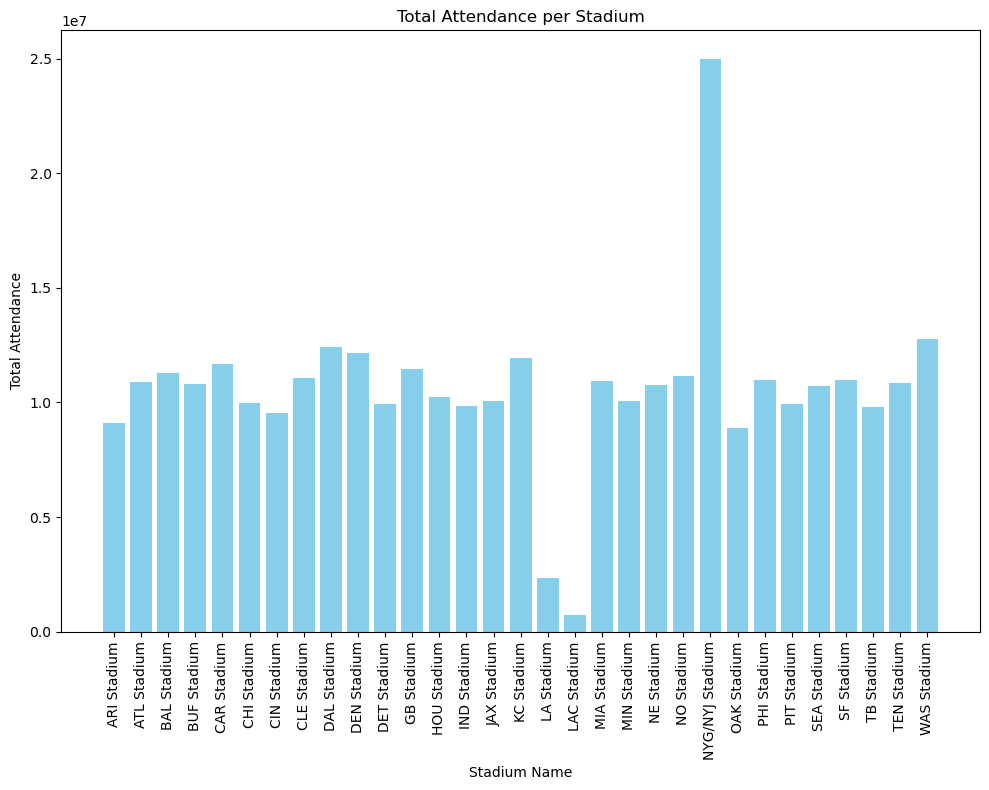

In [159]:
# Create a bar chart
plt.figure(figsize=(10, 8))  # Set the figure size
plt.bar(total_attendance_stadium['stadium_name'], total_attendance_stadium['Total Attendance'], color='skyblue')
plt.xlabel('Stadium Name')  # Set the x-axis label
plt.ylabel('Total Attendance')  # Set the y-axis label
plt.title('Total Attendance per Stadium')  # Set the title
plt.xticks(rotation=90)  # Rotate the stadium names for better readability
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

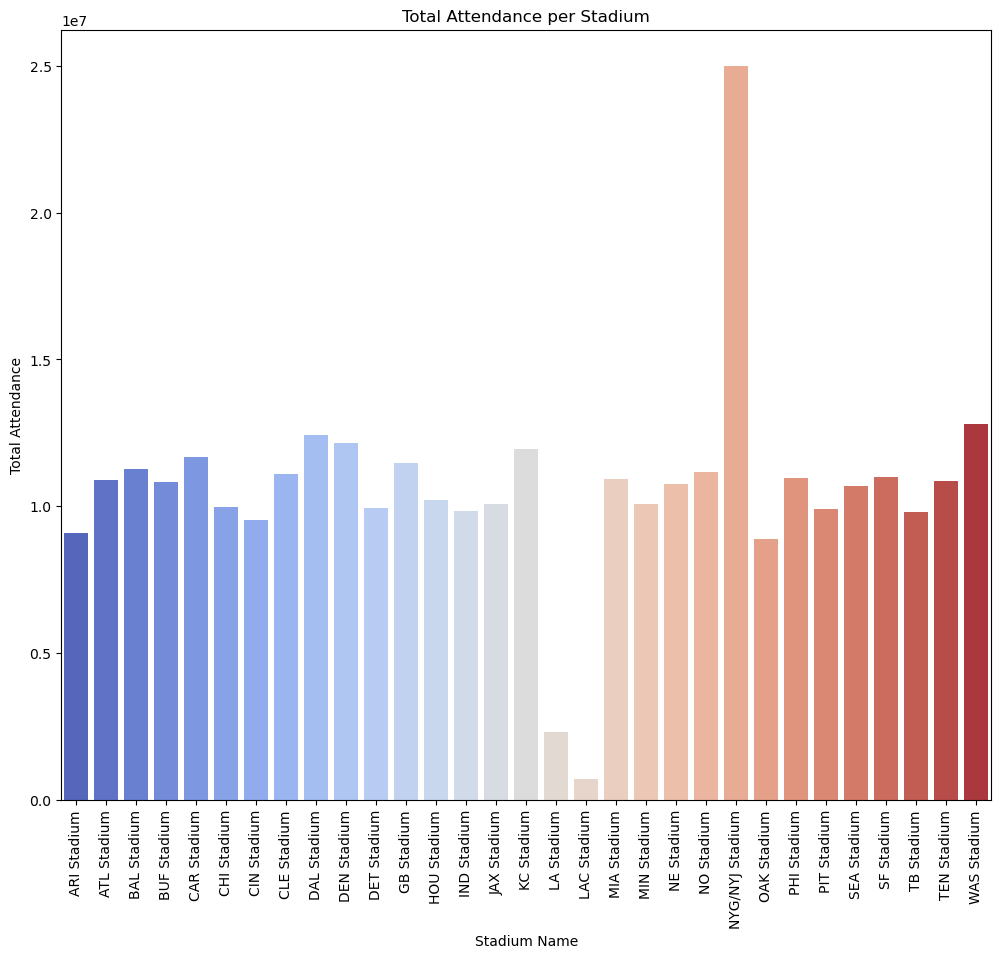

In [160]:
# Create a bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x='stadium_name', y='Total Attendance', data=total_attendance_stadium, palette='coolwarm')
plt.xlabel('Stadium Name')
plt.ylabel('Total Attendance')
plt.title('Total Attendance per Stadium')
plt.xticks(rotation=90)  # Rotate the labels to fit them better
plt.show()

In [134]:
# Load your dataset
import plotly.express as px
# Calculate average attendance for each stadium
average_attendance = result.groupby('stadium_name')['weekly_attendance'].mean().reset_index()

# Sort the data by average attendance to make the chart more readable
average_attendance = average_attendance.sort_values(by='weekly_attendance', ascending=False)

# Create the bar chart using Plotly Express
fig = px.bar(average_attendance, y='stadium_name', x='weekly_attendance', 
             title='Average Weekly Attendance by Stadium',
             labels={'weekly_attendance': 'Average Attendance', 'stadium_name': 'Stadium'},
             color='weekly_attendance',  # Color bars by attendance, creating a gradient effect
             height=600)  # Adjust the height of the figure to fit all bars

# Show the plot
fig.show()

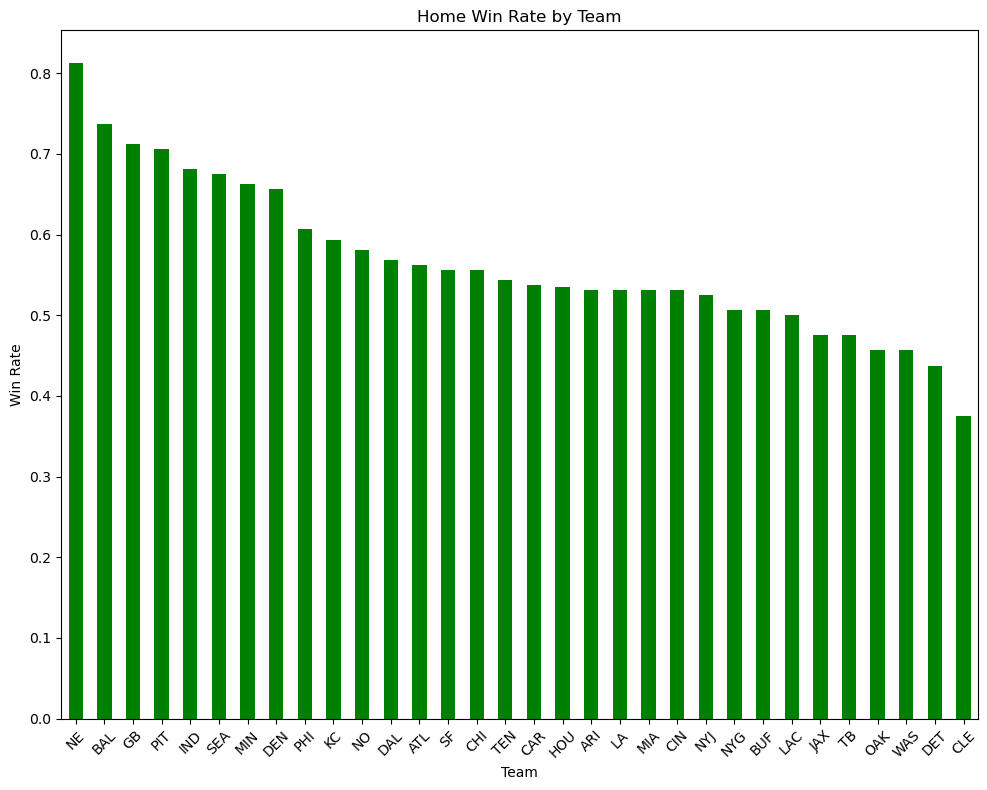

In [161]:
home_wins = result[result['home_team_win'] == 1].groupby('home_team').size()
total_home_games = result.groupby('home_team').size()
home_win_rate = (home_wins / total_home_games).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
home_win_rate.plot(kind='bar', color='green')
plt.title('Home Win Rate by Team')
plt.xlabel('Team')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [135]:
result.head()

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,team_name,weekly_attendance,last_name,team_abbr,Team,longitude,latitude,winning_team,home_team_win,stadium_name
0,2000_01_TEN_BUF,2000,1,2000-09-03,Sunday,10.0,73.0,BUF,TEN,16.0,...,Bills,72492.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
1,2000_02_GB_BUF,2000,2,2000-09-10,Sunday,8.0,81.0,BUF,GB,27.0,...,Bills,77722.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
2,2000_05_IND_BUF,2000,5,2000-10-01,Sunday,10.0,70.0,BUF,IND,16.0,...,Bills,72617.0,Bills,BUF,Bills,-78.786978,42.773739,IND,False,BUF Stadium
3,2000_07_SD_BUF,2000,7,2000-10-15,Sunday,7.0,63.0,BUF,LAC,27.0,...,Bills,72351.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
4,2000_09_NYJ_BUF,2000,9,2000-10-29,Sunday,6.0,46.0,BUF,NYJ,23.0,...,Bills,72861.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium


/var/folders/9w/dgxmbyyn2hl1p64rjgpmgw880000gn/T/ipykernel_22090/1732764920.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



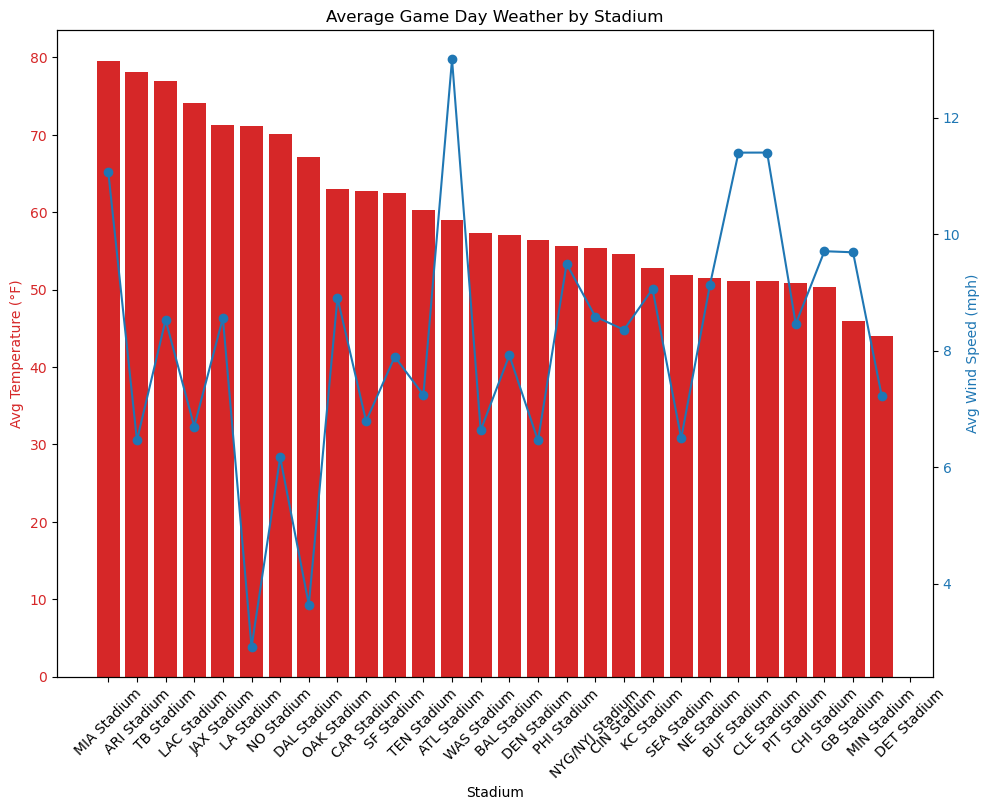

In [137]:
import seaborn as sns

# Calculate average temperature and wind speed per stadium
stadium_weather = result.groupby('stadium_name').agg({
    'temp': 'mean',
    'wind': 'mean'
}).sort_values(by='temp', ascending=False)

# Dual-axis plot for temperature and wind
fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:red'
ax1.set_xlabel('Stadium')
ax1.set_ylabel('Avg Temperature (°F)', color=color)
ax1.bar(stadium_weather.index, stadium_weather['temp'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(stadium_weather.index, rotation=45)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Avg Wind Speed (mph)', color=color)
ax2.plot(stadium_weather.index, stadium_weather['wind'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Game Day Weather by Stadium')
plt.show()

In [172]:
total_seasonal_attendance = result.groupby(['stadium_name', 'season'])['weekly_attendance'].sum().reset_index(name='Total Seasonal Attendance')


# Genre

Genre. Which genre of data story did you use?

* For this project, we decided to choose the magazine style as our presentation genre for the storytelling and data visualization. There are several factors that play into this decision. Firstly, we believe that the magazine style provides readers with efficiency when reading our project, as well as visually appealing images. The magazine style genre offers opportunities to present complex and diverse visualizations in a simpler way, which influences audience engagement and clarity. 

Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

* We used the following tools from the categories of Visual Narrative:
    * Visual Structuring: 
    * Highlighting:
    * Transition Guidance: 


Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

* We used the following tools from the categories of Narratuve Structure:
    * Ordering: 
    * Interactivity:
    * Messaging: 
    



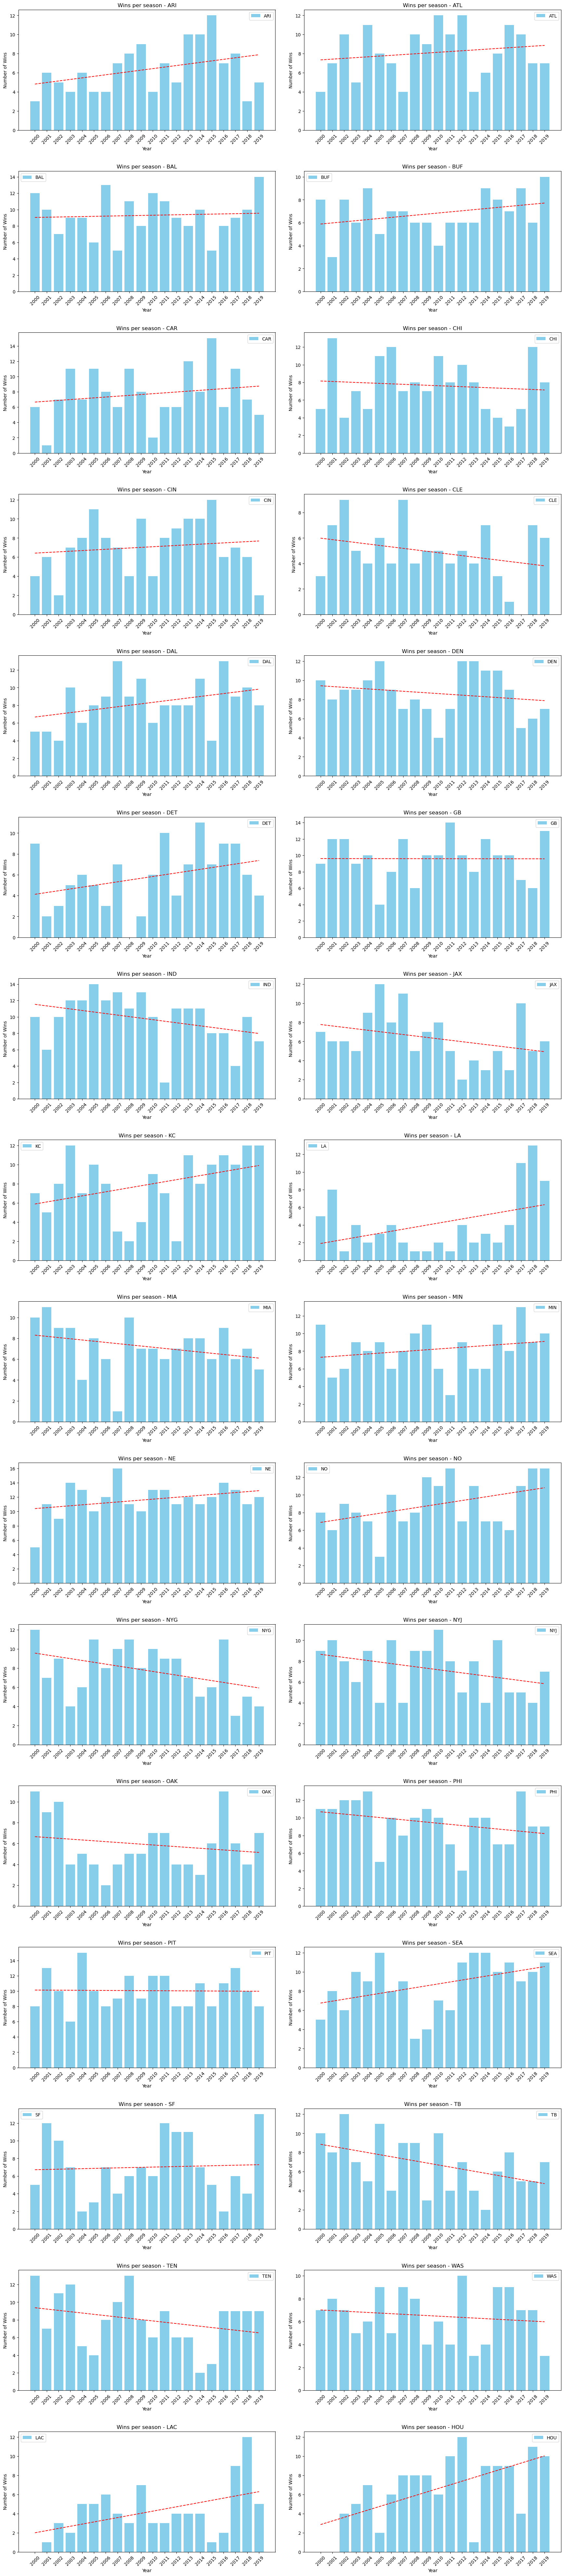

In [178]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Pivot the table to have teams as columns and years as rows
wins_pivot = wins_per_season.pivot(index='season', columns='winning_team', values='wins').fillna(0)

# Plot each team separately
teams = wins_per_season['winning_team'].unique()
num_teams = len(teams)
num_cols = 2  # Number of columns for subplots
num_rows = (num_teams + 1) // num_cols  # Calculate number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows))

for i, team in enumerate(teams):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]
    
    ax.bar(wins_pivot.index, wins_pivot[team], label=team, color='skyblue')
    ax.set_title(f'Wins per season - {team}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Wins')
    ax.legend()

    # Calculate trendline using linear regression
    x = np.array(wins_pivot.index).reshape(-1, 1)
    y = wins_pivot[team].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    trendline = model.predict(x)
    ax.plot(wins_pivot.index, trendline, color='red', linestyle='--', label='Trendline')

    ax.set_xticks(wins_pivot.index)
    ax.set_xticklabels(wins_pivot.index, rotation=45)

    # Set y-ticks to display only even numbers
    y_ticks = np.arange(0, max(wins_pivot[team]) + 1, 2)
    ax.set_yticks(y_ticks)

plt.tight_layout(pad=3.0)  # Increase padding between subplots
plt.show()

In [215]:

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.layouts import column
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis256
from bokeh.transform import Dodge  
from bokeh.plotting import reset_output
from bokeh.palettes import Category20
from bokeh.palettes import Category20
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange, CDSView, BooleanFilter
from bokeh.models import FactorRange
from bokeh.models import Legend
from bokeh.models import ColumnDataSource, HoverTool


reset_output()
source2 = ColumnDataSource(wins_pivot.reset_index())

num_teams = len(teams)
palette = [Category20[20][i % 20] for i in range(num_teams)]

# Create a new figure
pp = figure(title="Wins per Season by Team", x_axis_label='Season', y_axis_label='Number of Wins',
           tools="pan,wheel_zoom,box_zoom,reset,save", width=1300, height=1000)

bars = {}
for i, team in enumerate(teams):
    bars[team]=pp.vbar(x='season', top=team, width=0.4, source=source2, 
            legend_label=team, color=palette[i],
            muted_color=palette[i], muted_alpha=0.04,muted=True,alpha=0.8)


# Configure legend
pp.legend.location = "top_left"
pp.legend.click_policy = "mute"  # Allows users to click on legend items to hide/show lines

pp.legend.location = "top_right"
pp.legend.orientation = "horizontal"
pp.legend.border_line_color = None
show(pp)

In [ ]:
yes

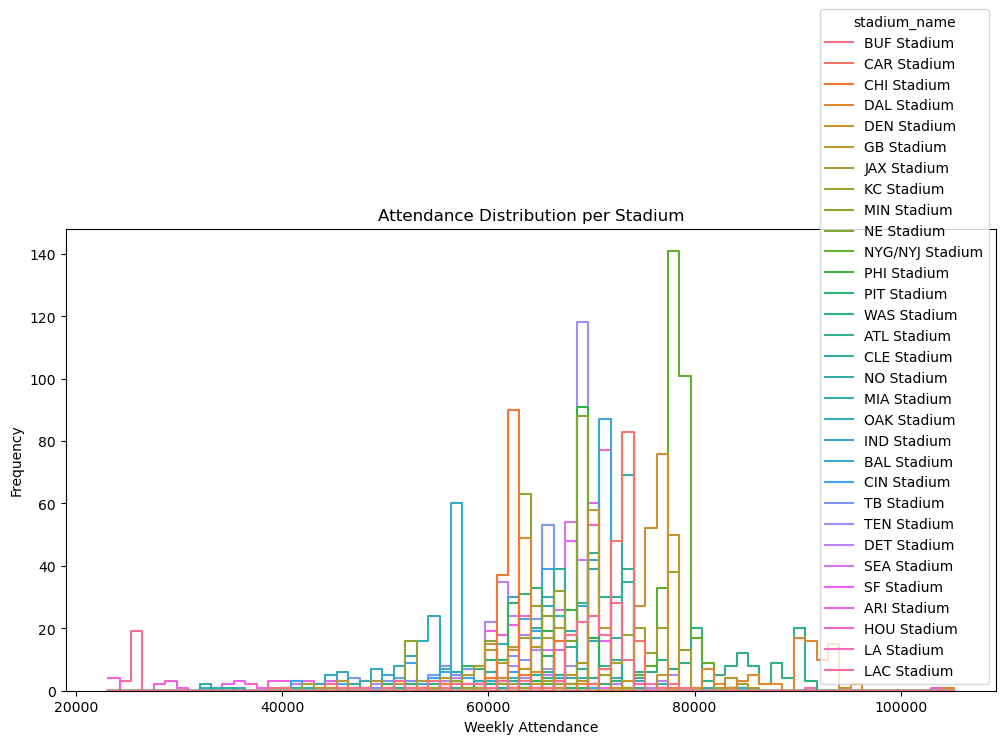

In [216]:
plt.figure(figsize=(12, 6))
sns.histplot(data=result, x='weekly_attendance', hue='stadium_name', element='step', fill=False)
plt.title('Attendance Distribution per Stadium')
plt.xlabel('Weekly Attendance')
plt.ylabel('Frequency')
plt.show()

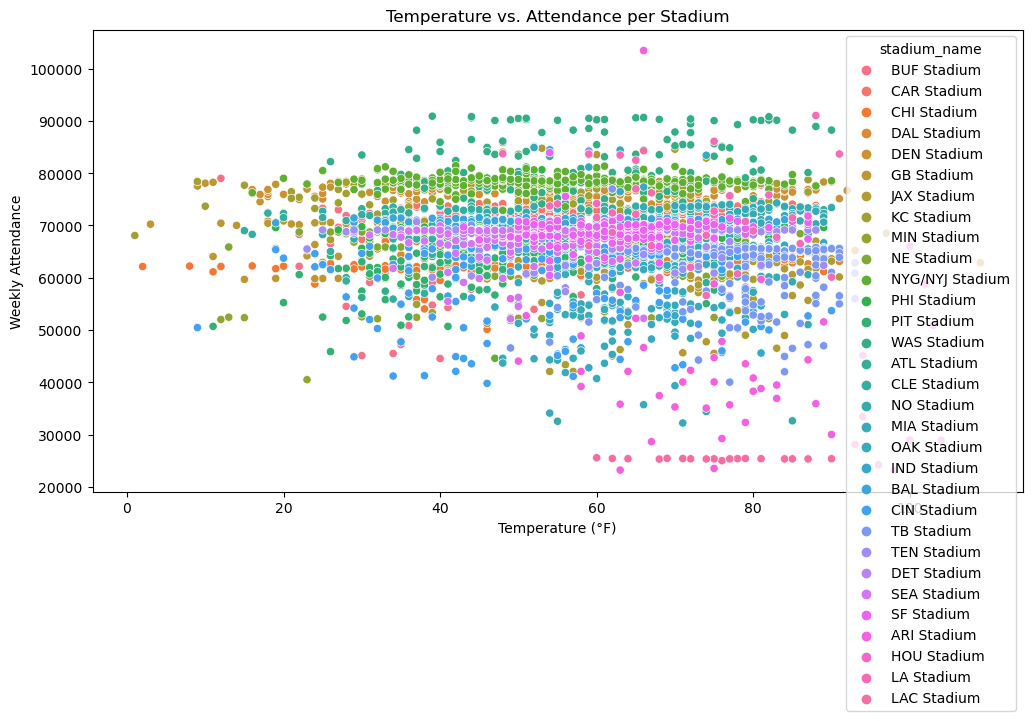

In [217]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=result, x='temp', y='weekly_attendance', hue='stadium_name')
plt.title('Temperature vs. Attendance per Stadium')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Attendance')
plt.show()

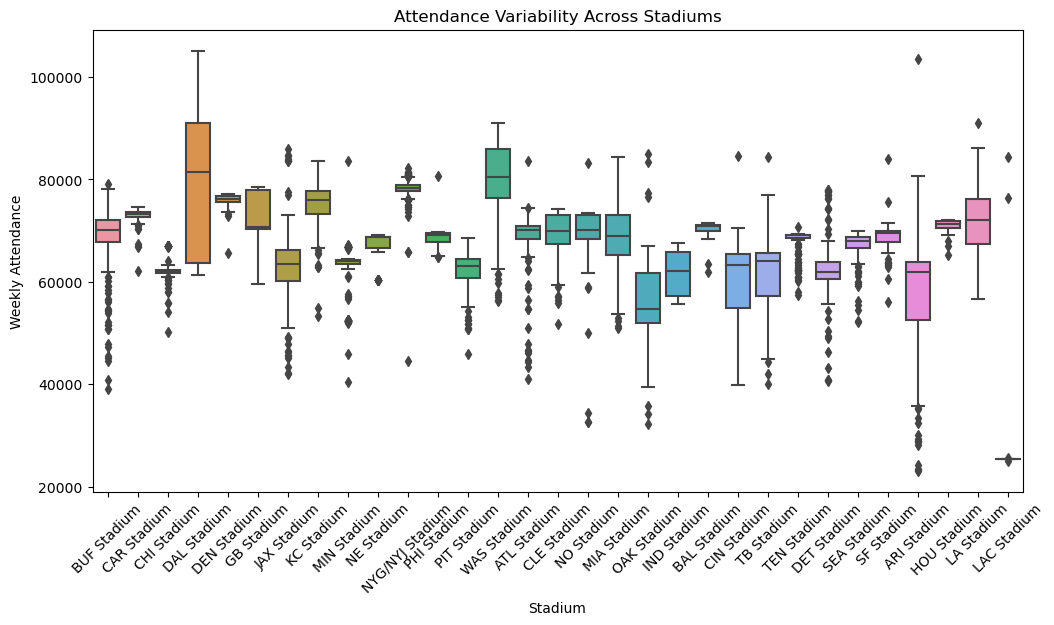

In [218]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=result, x='stadium_name', y='weekly_attendance')
plt.xticks(rotation=45)
plt.title('Attendance Variability Across Stadiums')
plt.xlabel('Stadium')
plt.ylabel('Weekly Attendance')
plt.show()

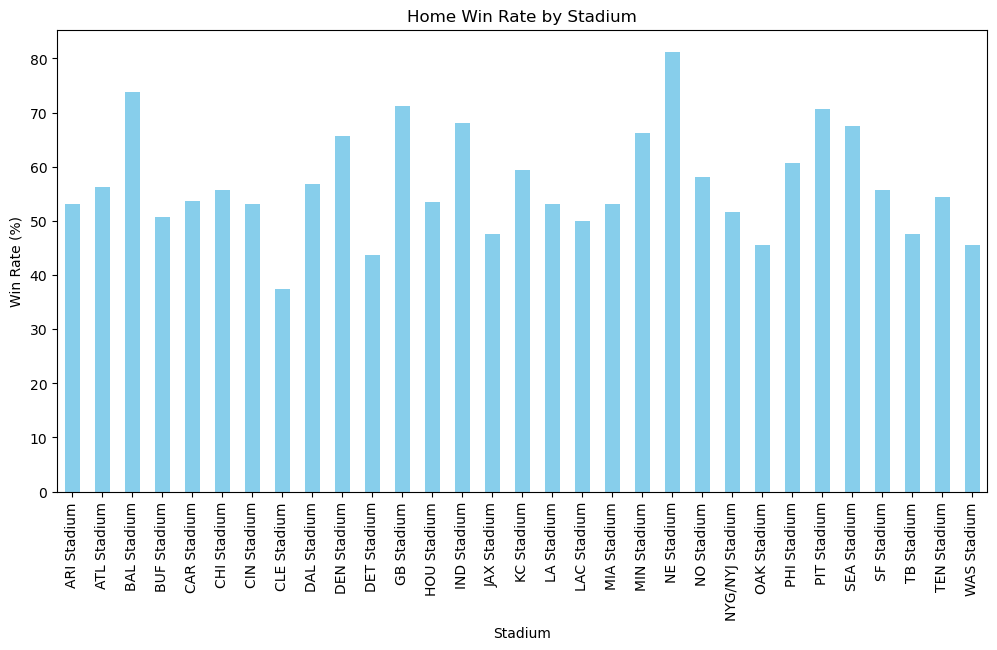

In [219]:
home_wins = result[result['home_team_win'] == 1].groupby('stadium_name').size()
home_games = result.groupby('stadium_name').size()
win_rates = home_wins / home_games * 100

win_rates.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Home Win Rate by Stadium')
plt.xlabel('Stadium')
plt.ylabel('Win Rate (%)')
plt.show()

In [223]:
home_wins

stadium_name
ARI Stadium         85
ATL Stadium         90
BAL Stadium        118
BUF Stadium         81
CAR Stadium         86
CHI Stadium         89
CIN Stadium         85
CLE Stadium         60
DAL Stadium         91
DEN Stadium        105
DET Stadium         70
GB Stadium         114
HOU Stadium         77
IND Stadium        109
JAX Stadium         76
KC Stadium          95
LA Stadium          17
LAC Stadium         12
MIA Stadium         85
MIN Stadium        106
NE Stadium         130
NO Stadium          93
NYG/NYJ Stadium    165
OAK Stadium         73
PHI Stadium         97
PIT Stadium        113
SEA Stadium        108
SF Stadium          89
TB Stadium          76
TEN Stadium         87
WAS Stadium         73
dtype: int64

In [224]:
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# If you want to analyze all seasons together:
total_wins = wins_per_season.groupby('winning_team')['wins'].sum().reset_index()

In [227]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.palettes import Category20
from bokeh.io import reset_output


reset_output()
output_notebook()

# Teams and their corresponding colors
teams = total_wins['winning_team'].unique()
palette = [Category20[20][i % 20] for i in range(len(teams))]

# Create a list to hold the histogram figures
histograms = []

# Create histograms
for i, team in enumerate(teams):
    team_wins = wins_per_season[wins_per_season['winning_team'] == team]['wins']
    hist, edges = np.histogram(team_wins, bins=10)  # You can adjust bins as necessary
    
    p = figure(title=f"Histogram of Wins for {team}", tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color=palette[i], line_color='white', alpha=0.5)
    
    p.xaxis.axis_label = 'Number of Wins per Season'
    p.yaxis.axis_label = 'Frequency'
    histograms.append(p)

# Arrange plots in a grid
grid = gridplot(histograms, ncols=2, width=250, height=250)  # Adjust layout as needed

show(grid)

Loading BokehJS ...

In [231]:
reset_output()
output_notebook()

# Assuming 'result' DataFrame has 'weekly_attendance' and 'stadium_name'
stadiums = result['stadium_name'].unique()
palette = [Category20[20][i % 20] for i in range(len(stadiums))]

# Creating histogram data for each stadium
hist_data = {}
edges_data = {}
for i, stadium in enumerate(stadiums):
    hist, edges = np.histogram(result[result['stadium_name'] == stadium]['weekly_attendance'], bins=10)
    hist_data[stadium] = hist
    edges_data[stadium] = edges

# Creating a Bokeh figure
p = figure(title="Histogram of Weekly Attendance by Stadium", x_axis_label='Weekly Attendance', y_axis_label='Frequency',
           width=1300, height=1000, tools="pan,wheel_zoom,box_zoom,reset,save")

# Add quads for each histogram
for i, stadium in enumerate(stadiums):
    p.quad(top=hist_data[stadium], bottom=0, left=edges_data[stadium][:-1], right=edges_data[stadium][1:],
           fill_color=palette[i], line_color='white', alpha=0.8, legend_label=stadium,
           muted_color=palette[i], muted_alpha=0.1, muted=True)

# Configuring the interactive legend
p.legend.location = "top_right"
p.legend.orientation = "horizontal"
p.legend.click_policy = "mute"  # Allows users to click on legend items to hide/show histograms



show(p)

Loading BokehJS ...